Data Preprocessing Steps
- 
1. Reading Data
2. Exploring Data / Data Insight
3. Cleansing Data
4. Outlier Detection and Removing
5. Data Transformation (Normalize Data / Rescale Data)
6. Categorical into Numerical 
7. Dimensionality Reduction(PCA)
8. Handling Imbalanced Data
9. Feature Selection
10. Data Splitting

Importing Libraries
- 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()     
import numpy as np  
import pandas as pd 

Step 1: Reading Data
- 

In [15]:
data=pd.read_csv("C:\\Users\\DELL\\Downloads\\StudentsPerformance.csv")

Step 2: Exploring Data
-

In [17]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [23]:
data.shape

(1000, 8)

In [25]:
data.sample()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
94,female,group B,some college,standard,none,79,86,92


In [27]:
data.sample(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
239,male,group C,associate's degree,standard,none,84,80,80
920,male,group D,high school,free/reduced,none,69,70,67
261,male,group C,some college,standard,completed,79,79,78
843,male,group B,some college,free/reduced,completed,74,77,76
447,male,group C,high school,standard,completed,86,81,80
928,male,group E,associate's degree,free/reduced,completed,46,43,44
794,female,group B,high school,standard,none,42,52,51


In [29]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Step 3: Data Cleaning
- 

Handling Missing Values
- 

- Imputation: Filling missing values with mean.

In [34]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [36]:
import pandas as pd
import numpy as np

In [38]:

numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

In [40]:
numeric_cols.fillna(numeric_cols.mean(), inplace=True)   

In [42]:
data = pd.concat([numeric_cols, non_numeric_cols], axis=1)

In [44]:
missing_values = data.isnull().sum()
print(missing_values)

math score                     0
reading score                  0
writing score                  0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
dtype: int64


In [46]:
data.shape

(1000, 8)

Removal: Deleting rows with missing values.
-

In [49]:
data=pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [51]:
data.shape

(1000, 8)

In [53]:
data.dropna(inplace=True)
missing_values = data.isnull().sum()
print(missing_values)


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [55]:
data.shape

(1000, 8)

Removing Duplicates
- 

In [58]:
data=pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")
data.shape


(1000, 8)

In [60]:
data.drop_duplicates(inplace=True)
data.shape

(1000, 8)

Step 4: Outlier Detection and Removal
- 

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
data=pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")


data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [67]:
0.25-1.5*0.5 

-0.5

In [69]:
0.75 + 1.5 * 0.5 

1.5

In [71]:
numeric_cols = data.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

In [73]:
data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [75]:
plt.figure(figsize=(20, 6))

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

Text(0.5, 1.0, 'Before Outlier Removal')

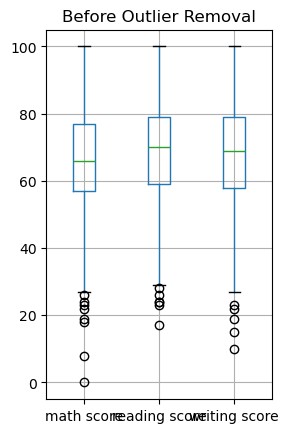

In [77]:
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")

In [79]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

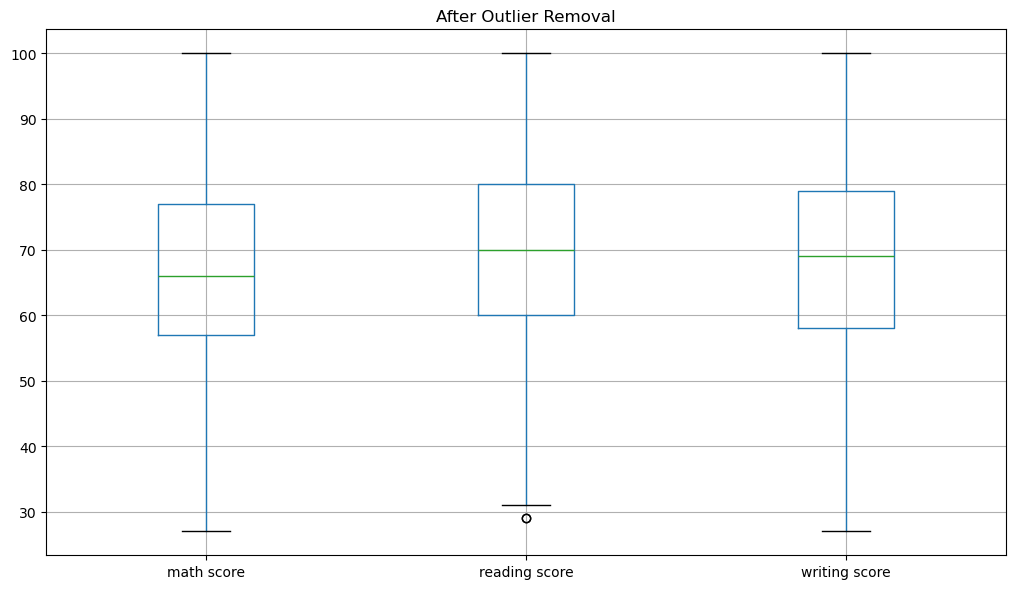

In [81]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()

In [83]:
data_cleaned.shape

(988, 8)

In [85]:
data_cleaned.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Step 5: Data Transformation
- 

Normalization
- 
- Normalization rescales the data to a fixed range, typically [0, 1] or [-1, 1].

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")



In [5]:
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

In [7]:
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

In [9]:
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

In [11]:
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

In [13]:
print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(1000, 8)

************************************************************


,math score,reading score,writing score,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0.72,0.662651,0.711111,female,group B,bachelor's degree,standard,none
1,0.69,0.879518,0.866667,female,group C,some college,standard,completed
2,0.90,0.939759,0.922222,female,group B,master's degree,standard,none
3,0.47,0.481928,0.377778,male,group A,associate's degree,free/reduced,none
4,0.76,0.734940,0.722222,male,group C,some college,standard,none


Standarization
-
- Standardization rescales the data so that it has a mean of 0 and a standard deviation of 1.

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



In [18]:
data=pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")

In [20]:
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

In [22]:
scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

In [24]:
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

In [26]:
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

In [28]:
print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(1000, 8)

************************************************************


,math score,reading score,writing score,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0.390024,0.193999,0.391492,female,group B,bachelor's degree,standard,none
1,0.192076,1.427476,1.313269,female,group C,some college,standard,completed
2,1.577711,1.770109,1.642475,female,group B,master's degree,standard,none
3,-1.259543,-0.833899,-1.583744,male,group A,associate's degree,free/reduced,none
4,0.653954,0.605158,0.457333,male,group C,some college,standard,none


# Step 6: One-Hot Encoding


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [33]:
data=pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [35]:
data["math score"].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [37]:
data.gender.unique()

array(['female', 'male'], dtype=object)

In [39]:
data.lunch.unique()

array(['standard', 'free/reduced'], dtype=object)

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [37]:
data=pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")

cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']

data1 = pd.get_dummies(cat_features)
data1

,gender,lunch,parental level of education,race/ethnicity,test preparation course
0,True,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,True,False,False,False
4,False,False,False,False,True


In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       5 non-null      bool 
 1   lunch                        5 non-null      bool 
 2   parental level of education  5 non-null      bool 
 3   race/ethnicity               5 non-null      bool 
 4   test preparation course      5 non-null      bool 
dtypes: bool(5)
memory usage: 157.0 bytes


In [39]:
cat_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [5]:
data=pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")

In [25]:
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']

In [27]:
data1 = pd.get_dummies(data, columns=cat_features)

In [29]:
scaled_data = pd.concat([data, data1], axis=1)

In [31]:
print(scaled_data.shape)
print()
print('*' * 70)

scaled_data.head()

(1000, 28)

**********************************************************************


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score,reading score,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,...,False,True,False,False,False,False,False,True,False,True
1,female,group C,some college,standard,completed,69,90,88,69,90,...,False,False,False,False,True,False,False,True,True,False
2,female,group B,master's degree,standard,none,90,95,93,90,95,...,False,False,False,True,False,False,False,True,False,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,47,57,...,True,False,False,False,False,False,True,False,False,True
4,male,group C,some college,standard,none,76,78,75,76,78,...,False,False,False,False,True,False,False,True,False,True


In [33]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [35]:
scaled_data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'math score', 'reading score', 'writing score',
       'gender_female', 'gender_male', 'race/ethnicity_group A',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [65]:
data1.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,69,90,88,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,90,95,93,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,47,57,44,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76,78,75,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True


# Step 7: Data Reduction

Dimensionality Reduction
-
PCA (Principal Component Analysis)
-
- Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and statistics. It transforms a large set of variables into a smaller one that still contains most of the important information in the original dataset.

In [69]:
scaled_data.shape

(1000, 28)

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [73]:
data=pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")

In [75]:
data.fillna(data.mean(numeric_only=True), inplace=True)

In [77]:
cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']

In [79]:
data = pd.get_dummies(data, columns=cat_features)

In [81]:
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features].values)

In [83]:
pca = PCA(n_components=15)
data_pca = pca.fit_transform(data)

In [85]:
print(data_pca.shape)
print(data_pca[:5]) 

(1000, 15)
[[ 0.6051087  -0.32144295 -0.83879426 -0.12209621 -0.2256112  -0.58485022
  -0.5193735  -0.06477714  0.20240273 -0.31645489  0.95649524 -0.26681014
  -0.33820253  0.1549964  -0.0429758 ]
 [ 1.90967589 -0.97101197  0.25010229 -0.7942898   0.4375541   0.85105545
  -0.32600232 -0.2452174  -0.12046777 -0.25795538 -0.13234046  0.15087593
   0.2712818  -0.3330418  -0.03682272]
 [ 2.87254362 -0.31073961 -0.87782606  0.28738022 -0.1462269  -0.62750434
  -0.56885222  0.02423844  0.21291037 -0.45200366  0.04885884 -0.09315721
   0.55102432  0.82628312 -0.17269448]
 [-2.30580249  0.31270344  0.31961014  0.76437162  0.2215026  -0.53085372
   0.47860571 -0.48038345  0.05177701  0.05878048  0.01644012  1.07648731
   0.17150015 -0.20453239 -0.29539092]
 [ 0.92405423  0.80041774 -0.4890216   0.09798162  0.7397468   0.81164009
  -0.35204286 -0.23562356  0.06172362 -0.32586844 -0.10443534  0.09033641
   0.22479822 -0.2411892   0.11747567]]


Text(0, 0.5, 'reading score')

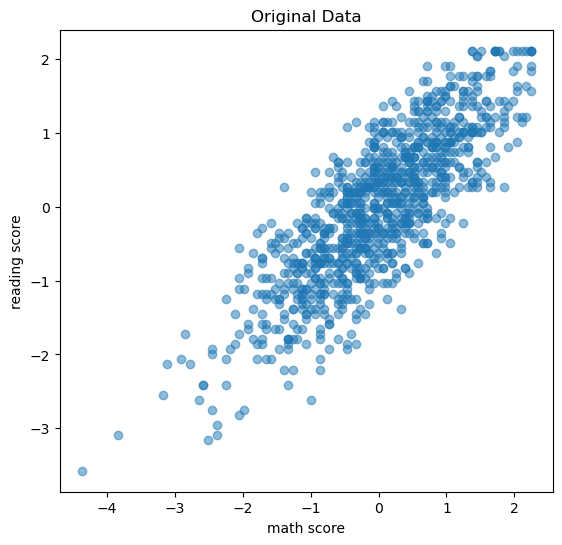

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(data[numeric_features[0]], data[numeric_features[1]], alpha=0.5)
plt.title('Original Data')
plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[1])


In [89]:
pca = PCA(n_components=15)  
data_pca = pca.fit_transform(data)

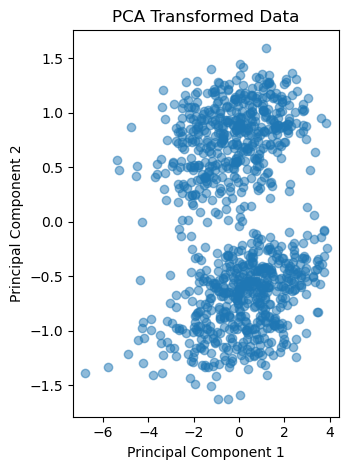

In [91]:
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

In [93]:
type(data_pca)

numpy.ndarray

In [95]:
data_pca.ndim

2

In [97]:
data_pca.shape

(1000, 15)

# Step 8: Handling Imbalanced Data
    
Resampling Techniques
-
Resampling changes the dataset to balance the class distribution. There are two main strategies:

1-  Oversampling (increase minority class)
2-  Undersampling (reduce majority class)

Oversampling
-
Oversampling involves increasing the number of minority class samples, typically by duplicating existing ones or creating synthetic examples.

In [100]:
data=pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")

data.lunch.value_counts(True)

lunch
standard        0.645
free/reduced    0.355
Name: proportion, dtype: float64

In [102]:
data.shape

(1000, 8)

In [253]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from collections import Counter

In [255]:
data = pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")

In [257]:
data.fillna(data.mean(numeric_only=True), inplace=True)

In [259]:
data['math score'] = (data['math score'] > 50).astype(int)


In [261]:
y = data['math score']
X = data.drop(columns=['math score'])

In [263]:
cat_features = [feature for feature in X.columns if X[feature].dtype == 'O']
numeric_features = [feature for feature in X.columns if X[feature].dtype != 'O']


In [265]:
X = pd.get_dummies(X, columns=cat_features)


In [267]:
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])


In [269]:
print("Before SMOTE:", Counter(y))


Before SMOTE: Counter({1: 850, 0: 150})


In [271]:
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [273]:
print("After SMOTE:", Counter(y_resampled))


After SMOTE: Counter({1: 850, 0: 850})


In [275]:
data_resampled = pd.concat([
    pd.DataFrame(X_resampled, columns=X.columns),
    pd.DataFrame(y_resampled, columns=['math score'])
], axis=1)

In [277]:
print(data_resampled.head())

   reading score  writing score  gender_female  gender_male  \
0       0.193999       0.391492           True        False   
1       1.427476       1.313269           True        False   
2       1.770109       1.642475           True        False   
3      -0.833899      -1.583744          False         True   
4       0.605158       0.457333          False         True   

   race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C  \
0                   False                    True                   False   
1                   False                   False                    True   
2                   False                    True                   False   
3                    True                   False                   False   
4                   False                   False                    True   

   race/ethnicity_group D  race/ethnicity_group E  \
0                   False                   False   
1                   False                   False   

In [279]:
data_resampled['math score'].value_counts()

math score
1    850
0    850
Name: count, dtype: int64

In [281]:
data_resampled.shape

(1700, 20)

Undersampling
-
Undersampling is a technique used when your dataset has more examples of one class than the other (like many "non-fraud" transactions and few "fraud" transactions).

In undersampling, we remove some of the extra examples from the class with more data, making both classes equal in number. This helps prevent the model from being biased towards the larger class.

In [139]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

In [141]:
data = pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")


In [143]:
data.fillna(data.mean(numeric_only=True), inplace=True)

In [145]:
cat_features = [col for col in data.columns if data[col].dtype == 'O']
numeric_features = ['math score', 'reading score', 'writing score']


In [147]:
data = pd.get_dummies(data, columns=cat_features)


In [149]:
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [151]:
threshold = data['math score'].median()
data['math score'] = (data['math score'] > threshold).astype(int)

In [153]:
X = data.drop(columns=['math score'])
y = data['math score']


In [155]:
print("Before undersampling:\n", y.value_counts())


Before undersampling:
 math score
0    507
1    493
Name: count, dtype: int64


In [214]:
if y.nunique() > 1:
    rus = RandomUnderSampler()
    X_resampled, y_resampled = rus.fit_resample(X, y)


In [216]:
 data_resampled = pd.concat(
        [pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['math score'])],
        axis=1
    )


In [218]:
print("After undersampling:\n", data_resampled['math score'].value_counts())
display(data_resampled.head())


After undersampling:
 math score
0      1
61     1
79     1
78     1
77     1
      ..
46     1
45     1
44     1
43     1
100    1
Name: count, Length: 81, dtype: int64


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,math score
59,female,group C,some high school,free/reduced,none,17,10,0
980,female,group B,high school,free/reduced,none,24,23,8
17,female,group B,some high school,free/reduced,none,32,28,18
787,female,group B,some college,standard,none,38,32,19
145,female,group C,some college,free/reduced,none,39,33,22


In [220]:
data_resampled['math score'].value_counts()


math score
0      1
61     1
79     1
78     1
77     1
      ..
46     1
45     1
44     1
43     1
100    1
Name: count, Length: 81, dtype: int64

In [222]:
data_resampled.shape


(81, 8)

# Step 9: Target Encoder
Target Encoding is a method used to convert categorical values (like "male", "female") into numbers, based on the target variable.

In [168]:
import pandas as pd
from category_encoders import TargetEncoder

In [186]:

data = {
    'gender': ['female', 'male', 'female', 'male', 'female'],
    'race/ethnicity': ['group A', 'group B', 'group C', 'group B', 'group A'],
    'math score': [72, 69, 90, 47, 76],
    'reading score': [72, 90, 95, 57, 78]
}
df = pd.DataFrame(data)

In [188]:
target_encoder = TargetEncoder(cols=['gender', 'race/ethnicity'])

In [192]:
target_encoded = target_encoder.fit_transform(df[['gender', 'race/ethnicity']], df['math score'])

In [194]:
print(target_encoded)

      gender  race/ethnicity
0  72.118104       71.253923
1  68.984306       68.984306
2  72.118104       73.298083
3  68.984306       68.984306
4  72.118104       71.253923


# Step 10: Splitting Data

In [198]:
from sklearn.model_selection import train_test_split

In [200]:
data = pd.read_csv("C://Users//DELL//Downloads//StudentsPerformance.csv")


In [202]:
X = data.drop('math score', axis=1)
y = data['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [204]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 7), (300, 7), (700,), (300,))